# Iris Test

Training a NN in the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

In [62]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data.csv', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Visualizing the Data Set

In [64]:
y_data = df.iloc[:, -1]

In [70]:
types_separated = [df.loc[df[4] == i] for i in y_data.unique()]

setosa = types_separated[0]
versicolor = types_separated[1]
virginica = types_separated[2]

### Sepal sizes plot

sepal sizes


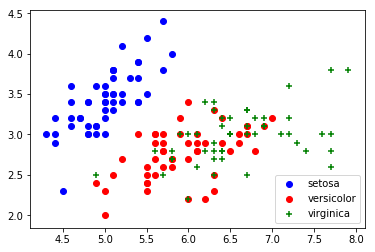

In [97]:
print('sepal sizes')

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(setosa[0], setosa[1], c='b', marker="o", label='setosa')
ax1.scatter(versicolor[0], versicolor[1], c='r', marker="o", label='versicolor')
ax1.scatter(virginica[0], virginica[1], c='g', marker="+", label='virginica')
plt.legend(loc='lower right');
plt.show()

### Petal sizes plot

petal sizes


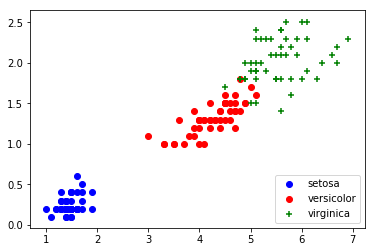

In [98]:
print('petal sizes')

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(setosa[2], setosa[3], c='b', marker="o", label='setosa')
ax1.scatter(versicolor[2], versicolor[3], c='r', marker="o", label='versicolor')
ax1.scatter(virginica[2], virginica[3], c='g', marker="+", label='virginica')
plt.legend(loc='lower right');
plt.show()

## Doing the NN

### Shuffling rows

In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
TRAINING_SET_SIZE = 0.8
TRAIN_SET_ENDING = int(len(df)*TRAINING_SET_SIZE)

### Dividing train and test set

(not gonna use cross-validation, just want a quick and dirty test)

In [30]:
train_data = df.iloc[:TRAIN_SET_ENDING, :]
test_data = df.iloc[TRAIN_SET_ENDING:, :].reset_index(drop=True)

In [46]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [47]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

### Feature normalization

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [53]:
mlp = MLPClassifier(hidden_layer_sizes=15, max_iter=10000)

In [54]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Testing the model

In [55]:
predictions = mlp.predict(X_test)

In [58]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

